In [1]:
import dvcx
import torch
import requests
import numpy as np

from io import BytesIO
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
# helpers functions

def prepare_input(image, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    """Normalize image nad convert to PyTorch tensor"""
    image = (image - np.array(mean)) / np.array(std)           # normalize image
    image = image.transpose(2, 0, 1)                           # change data format HWC -> CHW
    image = np.expand_dims(image, axis=0)                      # add batch dimention 
    return torch.from_numpy(image).float()

def colorize_mask(mask, n_classes, seed=42):
    """Convert maks to RGB for vizualisation"""
    np.random.seed(seed)
    colors = np.random.randint(256, size=(n_classes, 3)).astype('uint8')
    return colors[mask]

def load_image(url, size=None):
    """Load image by url and resize if needed"""
    response = requests.get(url)
    image = imread(BytesIO(response.content))
    if size is not None:
        image = resize(image, size)
    return image

In [3]:
# address of segmentation models repository
# required to summon models
REPO_URL = "https://github.com/qubvel/segmentation_models.pytorch"

### ADE20K dataset model

In [4]:
# summon pretrained model using dvcx
model = dvcx.summon(
    "001_ade20k_fpn_srx50",                   # model name
    repo=REPO_URL,                            # segmentation models repository address
    rev="feature/dvc",                        # commit hash or branch name
    summon_file="zoo/ade20k.yaml",            # name of file where model is declared
)

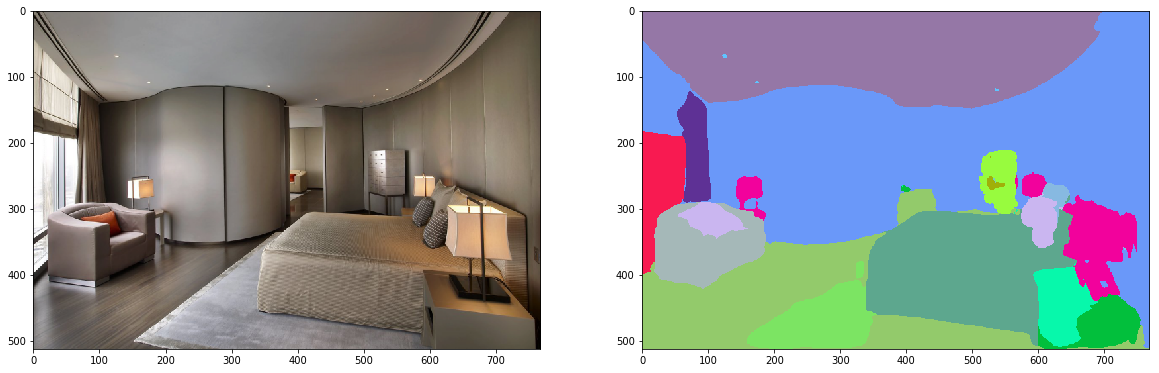

In [5]:
# load image
image_url = "https://avatars.mds.yandex.net/get-pdb/931389/cea37e88-7fdd-493d-8297-07cdc8c57e19/s1200"
image_size = 512, 768
image = load_image(image_url, image_size)

# prepare image and make prediction
image_tensor = prepare_input(image)
mask = model.predict(image_tensor)
mask = mask.numpy().squeeze()

# visualize result
rgb_mask = colorize_mask(mask, n_classes=150, seed=3)
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(rgb_mask)
plt.show()

### COCO-Stuff dataset model

In [6]:
# summon pretrained model using dvcx
model = dvcx.summon(
    "001_coco-stuff_fpn_srx50",               # model name
    repo=REPO_URL,                            # segmentation models repository address
    rev="feature/dvc",                        # commit hash or branch name
    summon_file="zoo/coco.yaml",              # name of file where model is declared
)

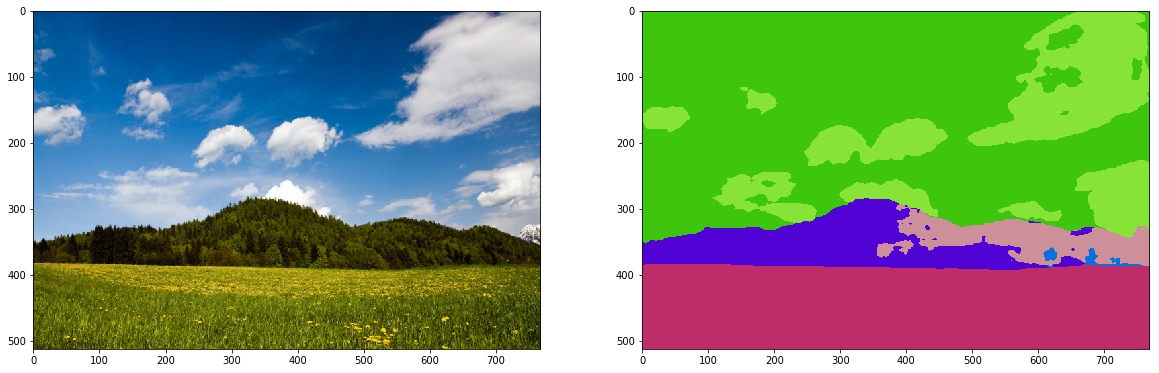

In [7]:
# load image
image_url = "https://img1.akspic.ru/image/46882-pejzazhi_gor-ekosistema-dnevnoe_vremya-senokosnoye_ugodye-den-2048x1152.jpg"
image_size = 512, 768
image = load_image(image_url, image_size)

# prepare image and make prediction
image_tensor = prepare_input(image)
mask = model.predict(image_tensor)
mask = mask.numpy().squeeze()

# visualize result
rgb_mask = colorize_mask(mask, n_classes=182, seed=1)
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(rgb_mask)
plt.show()

### CamVid Dataset

In [8]:
# summon pretrained model using dvcx
model = dvcx.summon(
    "001_camvid_fpn_srx50",                   # model name
    repo=REPO_URL,                            # segmentation models repository address
    rev="feature/dvc",                        # commit hash or branch name
    summon_file="zoo/camvid.yaml",            # name of file where model is declared
)

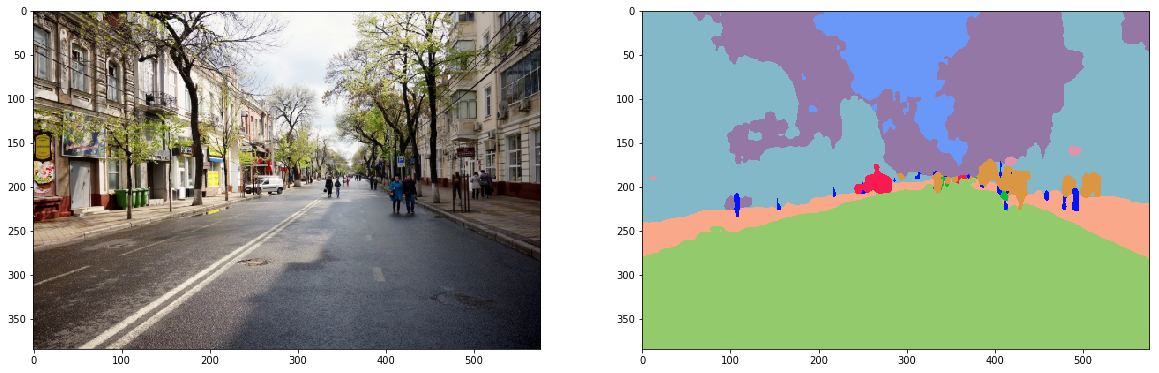

In [16]:
# load image
image_url = "https://rbsmi.ru/upload/iblock/382/3826ba989888b79c0d6120b9b34e664f.jpg"
image_size = 384, 576
image = load_image(image_url, image_size)

# prepare image and make prediction
image_tensor = prepare_input(image)
mask = model.predict(image_tensor)
mask = mask.numpy().squeeze()

# visualize result
rgb_mask = colorize_mask(mask, n_classes=12, seed=3)
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(rgb_mask)
plt.show()